In [ ]:
from keras import Sequential
from keras.applications.resnet_v2 import ResNet152V2
from keras.utils import image_dataset_from_directory
from keras.layers import Dense, Rescaling
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
train_dir = "./Original Data/train/"
test_dir = "./Original Data/test/"

In [ ]:
train_gen = image_dataset_from_directory(directory=train_dir,
                                         image_size=(256, 256))
test_gen = image_dataset_from_directory(directory=test_dir,
                                        image_size=(256, 256))

In [ ]:
rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

In [ ]:
base_model = ResNet152V2(include_top=False, weights="imagenet", input_shape=(256,256,3), pooling="avg")
model = Sequential()
model.add(base_model)
model.add(Dense(4,activation="softmax"))

opt = Adam(learning_rate=0.1)
base_model.trainable = False
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

In [ ]:
checkpoint = ModelCheckpoint('model.h5',monitor='val_loss',verbose=1,save_best_only=True,mode='min')
history = model.fit(train_gen,validation_data=test_gen,epochs=30,callbacks=[checkpoint])

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1 - loss: 0.5372, accuracy: 0.9864, val_loss: 0.5752, val_accuracy: 0.9873

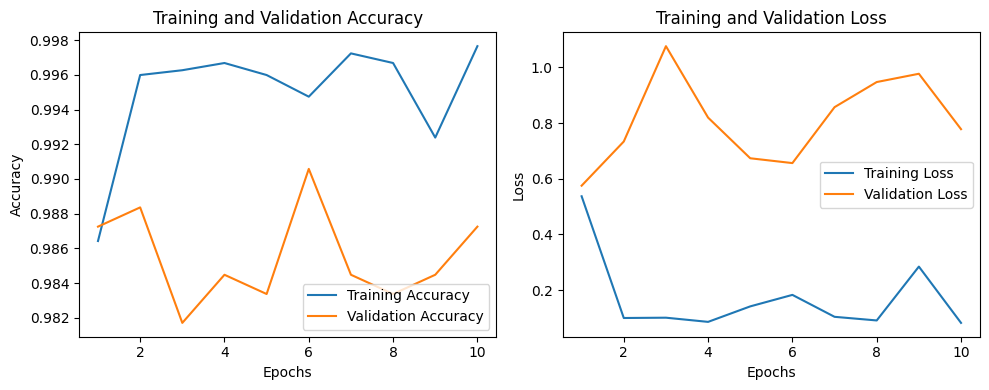